# Lab 09 – Frequent Patterns

**DUE: Feb 26, 2024 (Monday)**  

Pair Programming: Optional, but highly encouraged

Name(s): Harrison Halesworth
Class: CSCI 349 - Intro to Data Mining  
Section: 01-11am
Semester: Spring 2024
Instructors: Brian King, Joshua Stough


# Objectives
* `mlxtend` – your Python support for transactions, FP mining, and AR generation
* Because, you just can't get enough pandas

# Introduction
This lab will introduce you to frequent pattern mining and association rule generation using the `mlxtend` package.

## Work with someone!
As a reminder – I strongly recommend you work with someone for the remainder of the work in this course. You will get more out of the increasingly complex material. You don't need to work side by side in person. Discord is wonderful for having quick conversations, sharing your screen together, etc. Even better - both Visual Studio Code and Pycharm have plugins that let you do pair programming by sharing your IDE and working together on a single set of code. The work is going to become more challenging, and you and your partners will benefit from the shared, collaborative experience. Additionally, feel free to jump in and share ideas on Discord together.

If you work with someone, just a reminder - be sure to include BOTH partner names in the top header cell. And BOTH members should push up the notebook file to their respective repositories.

---
# Preparing for the lab


Work through this lab, and enter the answers to questions that are scattered throughout this lab. It is quite likely you'll need to add additional imports as you work through the lab.

## Installing mlxtend

Scikit-learn does not have the packages we need to do frequent pattern mining and association rule generation. These are available with a few alternative packages. We're going to use the package **`mlxtend`**, a machine learning set of extensions for python. This library adds many additional features and enhancements that were not included as part of the standard scikit-learn library.  See [mlxtend on Github](https://github.com/rasbt/mlxtend) for more information.

The `mlxtend` package is not available from the standard `defaults` channel in conda.  We'll install our package from the `conda-forge` channel, which contains an enormous number of packages put together by the conda community. I suggest not adding the channel to your conda installation, as it can substantially slow down future package updates. As usual, we'll do our conda management from the command line. (You can also use Anaconda Navigator, but do so at your own risk.)

### Follow these steps:

1. Open your terminal, and make sure your environment for the course is the active conda environment by typing `conda env list`
   * This will verify that `csci349` is the current environment (listed with an `*` next to it.) If it is not, then you didn't do the first step correctly.

2. Just incase you have a problem, I recommend making a backup of your environment by typing the following: `conda create --name csci349_backup --clone csci349`

   * (Of course, substitute `csci349` with whatever name you gave your course environment, if you did not use the name specified at the start of the semester.)

4.	`conda install mlxtend -c conda-forge`

   * This will install the `mlxtend` package directly from the `conda-forge` channel. NOTE: conda goes through a process of "solving your environment" to make sure that any dependencies to `mlxtend` are also installed and/or updated as needed. This may take a minute or so depending on the complexity of your installation.

NOTE – As of this writing, mlxtend is at 0.23.1, which has not been thoroughly tested with Python 3.10. However, my testing has not revealed any problems. You can accept the warnings that might appear while downloading and extracting the new packages.

### References:

These help pages for `mlxtend` are going to help you immensely when answering these questions:

- [Frequent Itemsets](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
- [Association Rules](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)



In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

---
# Exercises

---
**1)**	[P] Add the import statements for mlxtend (DONE FOR YOU)

In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

---
These first exercises are going to allow you to leverage the documentation from the mlxtend user guide online. The first few of these exercises are based on their examples with additional transactions they do not include. The second part of this lab will use a much more extensive transaction dataset.

---
**2a)**	[P] Go to the [apriori help page](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/). This site has some great, simple examples for you to refer to as you work through these exercises.

Copy the following list of lists... representing a small set of 8 transactons:

(DONE FOR YOU)

In [39]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Salsa'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt','Eggs'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Corn', 'Kidney Beans', 'Salsa', 'Onion', 'Milk', 'Eggs', 'Yogurt'],
           ['Milk', 'Yogurt', 'Ice cream', 'Eggs'],
           ['Onion','Eggs','Salsa','Apple','Milk', 'Kidney Beans']]
dataset


[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs', 'Salsa'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt', 'Eggs'],
 ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
 ['Corn', 'Kidney Beans', 'Salsa', 'Onion', 'Milk', 'Eggs', 'Yogurt'],
 ['Milk', 'Yogurt', 'Ice cream', 'Eggs'],
 ['Onion', 'Eggs', 'Salsa', 'Apple', 'Milk', 'Kidney Beans']]

---
**2b)** Now, copy the example code from the help page that transforms the list of lists to a `Transaction` collection, then to pandas `DataFrame` with the correct column names. Output your data frame.

In [40]:
# ANSWER

encoder = TransactionEncoder()
arr = encoder.fit(dataset).transform(dataset)

# Convert to pandas DataFrame
df = pd.DataFrame(arr, columns=encoder.columns_)

print(df)

   Apple   Corn   Dill  Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False  True      False          True   True    True   True   
1  False  False   True  True      False          True  False    True   True   
2   True  False  False  True      False          True   True   False  False   
3  False   True  False  True      False          True   True   False  False   
4  False   True  False  True       True          True  False   False   True   
5  False   True  False  True      False          True   True   False   True   
6  False  False  False  True       True         False   True   False  False   
7   True  False  False  True      False          True   True   False   True   

   Salsa  Unicorn  Yogurt  
0  False    False    True  
1  False    False    True  
2   True    False   False  
3  False     True    True  
4  False    False   False  
5   True    False    True  
6  False    False    True  
7   True    False   False  


---
**3)**	[P] Show the result of `describe()` and `info()` on your dataframe.

In [41]:
# ANSWER

print(df.describe())
print("\n")
print(df.info())

        Apple   Corn   Dill  Eggs Ice cream Kidney Beans  Milk Nutmeg Onion  \
count       8      8      8     8         8            8     8      8     8   
unique      2      2      2     1         2            2     2      2     2   
top     False  False  False  True     False         True  True  False  True   
freq        6      5      7     8         6            7     6      6     5   

        Salsa Unicorn Yogurt  
count       8       8      8  
unique      2       2      2  
top     False   False   True  
freq        5       7      5  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         8 non-null      bool 
 1   Corn          8 non-null      bool 
 2   Dill          8 non-null      bool 
 3   Eggs          8 non-null      bool 
 4   Ice cream     8 non-null      bool 
 5   Kidney Beans  8 non-null      bool 
 6   Milk         

---
**4)**	[P] Following along the `mlxtend` user guide, use the apriori algorithm to final all frequent itemsets with a `min_support=0.6`. Show the resulting dataframe, and store the result, since you'll have many selection exercises next. All selection exercises must be done from this resulting frame. Set `use_colnames=True`. It'll be much easier to interpret your patterns.

In [42]:
# ANSWER

freq = apriori(df, min_support=0.6, use_colnames=True)
freq

,support,itemsets
0,1.000,(Eggs)
1,0.875,(Kidney Beans)
2,0.750,(Milk)
3,0.625,(Onion)
4,0.625,(Yogurt)
5,0.875,"(Eggs, Kidney Beans)"
6,0.750,"(Milk, Eggs)"
7,0.625,"(Eggs, Onion)"
8,0.625,"(Yogurt, Eggs)"
9,0.625,"(Milk, Kidney Beans)"


---
**5)** [P] Using the data frame of frequent patterns, select all frequent itemsets that have support >=  0.75



In [43]:
# ANSWER

tmp = freq[freq["support"] >= 0.75]
tmp

,support,itemsets
0,1.000,(Eggs)
1,0.875,(Kidney Beans)
2,0.750,(Milk)
5,0.875,"(Eggs, Kidney Beans)"
6,0.750,"(Milk, Eggs)"


---
**6)** [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not one of them! It's entirely up to you. Do what makes the most sense to you.)



In [44]:
# ANSWER

tmp = freq[freq["itemsets"].apply(lambda x: len(x)) >= 2]
tmp

,support,itemsets
5,0.875,"(Eggs, Kidney Beans)"
6,0.750,"(Milk, Eggs)"
7,0.625,"(Eggs, Onion)"
8,0.625,"(Yogurt, Eggs)"
9,0.625,"(Milk, Kidney Beans)"
10,0.625,"(Kidney Beans, Onion)"
11,0.625,"(Milk, Eggs, Kidney Beans)"
12,0.625,"(Eggs, Onion, Kidney Beans)"


---
**7)**	[P] Select the frequent itemsets that contain 'Milk' in the itemset.

In [45]:
# ANSWER

tmp = freq[freq["itemsets"].apply(lambda x: "Milk" in x)]
tmp

,support,itemsets
2,0.750,(Milk)
6,0.750,"(Milk, Eggs)"
9,0.625,"(Milk, Kidney Beans)"
11,0.625,"(Milk, Eggs, Kidney Beans)"


---
**8)**	[P] Select the frequent itemsets that contain both 'Milk' **and** 'Eggs' in the itemset. (HINT: You should have 2 frequent itemsets selected. And, if you haven't learned about the `set` type in Python and all of the standard set operations, they can really make these types of questions much easier.)

In [46]:
# ANSWER

tmp = freq[freq["itemsets"].apply(lambda x: "Milk" in x and "Eggs" in x)]
tmp

,support,itemsets
6,0.750,"(Milk, Eggs)"
11,0.625,"(Milk, Eggs, Kidney Beans)"


---
**9)**	[P] Select the frequent itemsets that contain *either* an 'Onion' **or** 'Eggs' (or both) in the itemset. (HINT: You should have 9 frequent itemsets output.)

In [47]:
# ANSWER

tmp = freq[freq["itemsets"].apply(lambda x: "Onion" in x or "Eggs" in x)]
tmp

,support,itemsets
0,1.000,(Eggs)
3,0.625,(Onion)
5,0.875,"(Eggs, Kidney Beans)"
6,0.750,"(Milk, Eggs)"
7,0.625,"(Eggs, Onion)"
8,0.625,"(Yogurt, Eggs)"
10,0.625,"(Kidney Beans, Onion)"
11,0.625,"(Milk, Eggs, Kidney Beans)"
12,0.625,"(Eggs, Onion, Kidney Beans)"


---
**10)**	[P] Let's now dive into extracting association rules from frequent patterns. [The user guide on association rules](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) contains the all the information and guidance you need. (NOTE – they mention a function called `generate_rules()`. The function is `association_rules()`.)  Generate rules with a minimum confidence of 0.7. Store your resulting data frame called `rules`. Show the entire data frame. (You should have 20 rules).

In [48]:
# ANSWER

rules = association_rules(freq, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Eggs),(Kidney Beans),1.000,0.875,0.875,0.875000,1.000000,0.000000,1.0000,0.000000
1,(Kidney Beans),(Eggs),0.875,1.000,0.875,1.000000,1.000000,0.000000,inf,0.000000
2,(Milk),(Eggs),0.750,1.000,0.750,1.000000,1.000000,0.000000,inf,0.000000
3,(Eggs),(Milk),1.000,0.750,0.750,0.750000,1.000000,0.000000,1.0000,0.000000
4,(Onion),(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
5,(Yogurt),(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
6,(Milk),(Kidney Beans),0.750,0.875,0.625,0.833333,0.952381,-0.031250,0.7500,-0.166667
7,(Kidney Beans),(Milk),0.875,0.750,0.625,0.714286,0.952381,-0.031250,0.8750,-0.285714
8,(Kidney Beans),(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
9,(Onion),(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333


---
**11)**	[P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [49]:
# ANSWER

rules.sort_values(by=["lift", "confidence"], ascending=[False, False]).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Onion),(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
15,"(Eggs, Onion)",(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
18,(Onion),"(Eggs, Kidney Beans)",0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
8,(Kidney Beans),(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
16,"(Eggs, Kidney Beans)",(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000


---
**12)**	[P] Show all rules that have a 1.0 support for the antecedent.

In [50]:
# ANSWER

rules[rules["antecedent support"] == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Eggs),(Kidney Beans),1.0,0.875,0.875,0.875,1.0,0.0,1.0,0.0
3,(Eggs),(Milk),1.0,0.750,0.750,0.750,1.0,0.0,1.0,0.0


---
**13)**	[P] Show all rules that have at least 3 or more items represented in the rule (i.e. the size of union of the antecedent and consequent >= 3.)

In [51]:
# ANSWER

rules[rules['antecedents'].apply(lambda x: len(x) + len(rules.iloc[0]['consequents'])) >= 3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(Milk, Eggs)",(Kidney Beans),0.750,0.875,0.625,0.833333,0.952381,-0.031250,0.7500,-0.166667
11,"(Milk, Kidney Beans)",(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000
12,"(Eggs, Kidney Beans)",(Milk),0.875,0.750,0.625,0.714286,0.952381,-0.031250,0.8750,-0.285714
15,"(Eggs, Onion)",(Kidney Beans),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
16,"(Eggs, Kidney Beans)",(Onion),0.875,0.625,0.625,0.714286,1.142857,0.078125,1.3125,1.000000
17,"(Kidney Beans, Onion)",(Eggs),0.625,1.000,0.625,1.000000,1.000000,0.000000,inf,0.000000


---
**14)**	[P] Select the rules that have confidence >= 0.75 and a lift > 1

In [52]:
# ANSWER

rules[(rules["confidence"]>=0.75) & (rules["lift"]>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Onion),(Kidney Beans),0.625,0.875,0.625,1.0,1.142857,0.078125,inf,0.333333
15,"(Eggs, Onion)",(Kidney Beans),0.625,0.875,0.625,1.0,1.142857,0.078125,inf,0.333333
18,(Onion),"(Eggs, Kidney Beans)",0.625,0.875,0.625,1.0,1.142857,0.078125,inf,0.333333


---
# Chipotle Data

![Chipotle logo](https://s3-media0.fl.yelpcdn.com/bphoto/Kbj299Z7Txp8XW4f85OFzg/o.jpg)

Now, it's time to think about more food… so grab yerself some chips and salsa, and a burrito bowl and prepare to code with some indigestion. Why? Because you're going to work with a real dataset from **Chipotle**. Mmmmm….. queso.

These data were originally available for public use on Kaggle (https://www.kaggle.com/ )

>Get to know Kaggle at some point soon. If you have not yet set up an account on Kaggle, you should. It's an amazing repository of shared knowledge from data scientists worldwide, and also a platform for data mining and machine learning competitions which you might choose to take part in later.

This dataset represents a single day of transactions at a busy Chipotle store. Each observation represents one item purchased as part of an order. The quantity of that item is also indicated. Each order has one or more observations. The variables are:

* `order_id` : A unique identifier for one complete order
* `quantity` : The quantity of the item ordered
* `item_name` : The official name of the item ordered
* `choice_description` : A list of options for the item ordered. (For example, a Chicken Bowl, which is an official item, may have Tomatillo-Red Chili Salsa (Hot), Black Beans, Rice, Cheese, and Sour Cream listed in its choice description.
* `item_price` : The total price for the quantity of this item

The `item_name` variable is a nominal / categorical variable.`choice_description` contains a Python list of items that are part of the main item ordered. (For example, a `Chicken Bowl` may contain `Rice`, `Pinto Beans`, `Fresh Tomato Salsa`, etc.) The rest of the columns are self-explanatory.

Let's first review some basics… these should be "no-brainers" just to warm you up, and remind you of the importance of taking the time to check out your data, do some EDA, and preprocess it (before you eat it… ahem, I mean consume it? Munge on it? Preprocess it? Oh, never mind.)


---
**15)**	[P] Read in the Chipotle dataset:

```
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chip_df = pd.read_csv(url, sep = '\t')
```

DONE FOR YOU

In [53]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url, sep = '\t')

---
**16)**	[P] Show the result of `df_chip.info(verbose=True)`. You should have five variables.

In [54]:
# ANSWER

df_chip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


---
**17)**	[P] Show the output of `describe(include='all')`

In [55]:
# ANSWER

df_chip.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


---
**18)** [P] Get a sense of what the data look like. Display the first 10 observations.

In [56]:
### ANSWER

df_chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


---
**19)**	[M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types. Which ones, and what do you need to do with them? (HINT: When a variable is read in as a type `object`, that's a good indicator you have some work to do. Consider that order_id is a nominal, however, most businesses have some transaction id that is a number that increases over time, so just leave it as a number.)

**ANSWER:** Since item_name, choice descrption, and item price were all read in as objects, they will all need to be converted to a more appropriate data type. item name need to be considered items in an itemset and we are going to have to do something similar to the choice description as well and consider it some sort of transaction. order price just needs to be converted to a floating point number as it represents money.

---
**20)**	 [P] Let's start doing some preprocessing. Convert the `item_price` field to a floating-point number, then show the result of `df_chip.item_price.describe()` to show that it is indeed a numeric variable now.

In [57]:
# ANSWER

df_chip["item_price"] = df_chip["item_price"].astype(str).str.replace('$', '').astype(float)
df_chip.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


---
**21)**	[P] Now, convert the `item_name` to a categorical variable.

In [58]:
# ANSWER

df_chip["item_name"] = pd.Categorical(df_chip["item_name"])

---
**22)**	[P] How many unique `item_name` values are there?

In [59]:
# ANSWER

unique = df_chip["item_name"].nunique()
print("There are " + str(unique) + " unique item_name values.")

There are 50 unique item_name values.


---
**23)**	[P,M] Show all of the unique values in `item_name`. Do you see any potential problems? (Leave them! Don't fix them. Just pay close attention. Need a hint? Salsa)

In [60]:
# ANSWER

df_chip["item_name"].unique()

['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl', ..., 'Barbacoa Salad Bowl', 'Salad', 'Veggie Crispy Tacos', 'Veggie Salad', 'Carnitas Salad']
Length: 50
Categories (50, object): ['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', ..., 'Veggie Crispy Tacos', 'Veggie Salad', 'Veggie Salad Bowl', 'Veggie Soft Tacos']

**ANSWER:** There are item names that just represent some different form or variant of some main item, like salsa for instance. Maybe this will cause the item_name variable to be bloated?

---
**24)**	[P] How many distinct orders are there?

In [61]:
# ANSWER

distinct_orders = df_chip["order_id"].nunique()
print("There are " + str(distinct_orders) + " distinct orders.")

There are 1834 distinct orders.


---
**25)**	[P,M] Show a **boxplot** of the number of line items per order. Do NOT consider the quantity of each item, just the total count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count the number of items per order.) Then, comment on the distribution of the total number of items per order.

C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


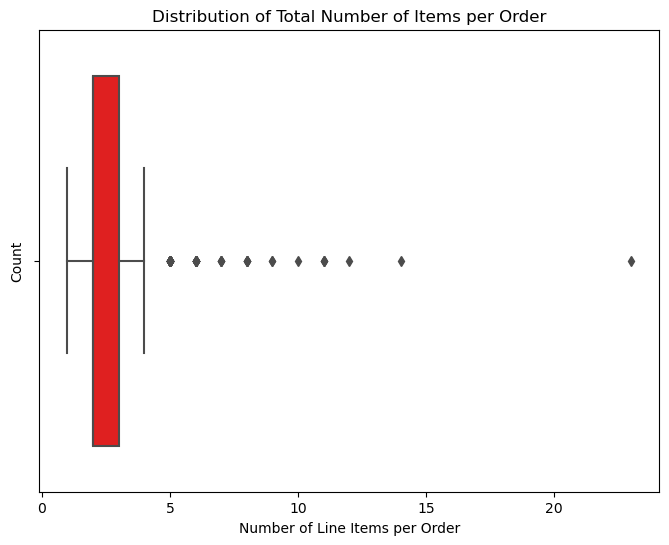

In [62]:
# ANSWER

items_per_order = df_chip.groupby("order_id").size()

plt.figure(figsize=(8, 6))
sns.boxplot(x=items_per_order, color="red")
plt.xlabel("Number of Line Items per Order")
plt.ylabel("Count")
plt.title("Distribution of Total Number of Items per Order")
plt.show()

**ANSWER:** We can see from this boxplot that a large majority of the orders contain between 0 and 5 items with a handful of outliers that contain more, which implies that when storing these itemsets as transactions, we must consider that it would be a sparse matrix if we choose to implement it as so.

---
**26)**	[P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order. (The box plot will be similar to the previous, with the exception that there will be more outliers, and the maximum outlier will be 35.)

C:\Users\hhale\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


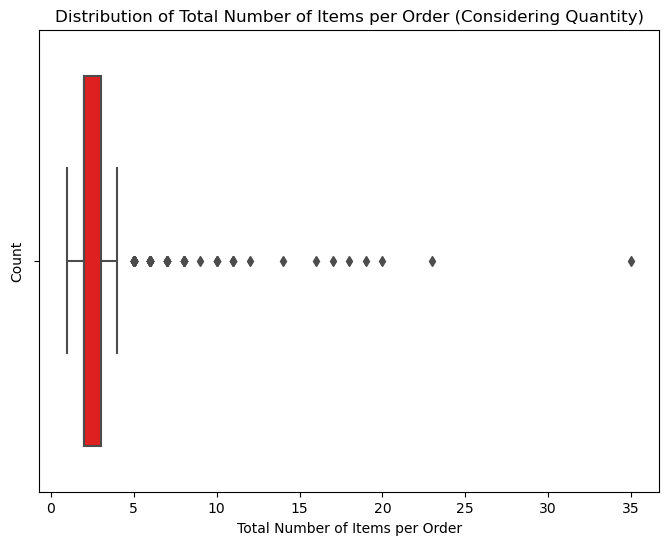

In [63]:
# ANSWER

total_items_per_order = df_chip.groupby("order_id")["quantity"].sum()

plt.figure(figsize=(8, 6))
sns.boxplot(x=total_items_per_order, color="red")
plt.xlabel("Total Number of Items per Order")
plt.ylabel("Count")
plt.title("Distribution of Total Number of Items per Order (Considering Quantity)")
plt.show()

---
**27)**	[P] OK. Let's mine! What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. (Be sure to consider the quantity of each item order!)

In [64]:
# ANSWER

top_items = df_chip.groupby("item_name", observed=False)["quantity"].sum()
top_items = top_items.sort_values(ascending=False).head(5)

print("The top 5 ordered items by total quantity are : \n" + str(top_items))

The top 5 ordered items by total quantity are : 
item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


---
**28)**	[P] What is the total number of `"Steak Burrito"`s ordered?

In [65]:
# ANSWER

count = df_chip.groupby("item_name", observed=False)["quantity"].sum()["Steak Burrito"]
print("There were a total number of " + str(count) + " Steak Burritos ordered.")

There were a total number of 386 Steak Burritos ordered.


---
**29)**	[P] What is the mean price for an order (NOTE – This is NOT just a mean of the `item_price` column!)

In [66]:
# ANSWER

tmp = df_chip.copy(deep=True)
tmp["total_amount"] = df_chip["item_price"] * df_chip["quantity"]
total_order_amount = tmp.groupby("order_id")["total_amount"].sum()
means = round(total_order_amount.mean(),2)

print("The mean price for an order was $" + str(means))

The mean price for an order was $21.39


---
**30)**	[P] What was total revenue for the day?

In [67]:
# ANSWER


rev = total_order_amount.sum()
print("The total revenue for the day was $" + str(rev))

The total revenue for the day was $39237.02


---
**31)**	[P] What was the largest total price for a single order? Show the order number and the total price.

In [68]:
# ANSWER

order_total = df_chip.groupby("order_id")["item_price"].sum()
max_order_id = order_total.idxmax()
max_total_price = order_total.max()
print("Order Number: " + str(max_order_id))
print("Total Price: $" + str(max_total_price))

Order Number: 926
Total Price: $205.25


---
**32)** Show the entire order to your answer to the previous question

In [69]:
# ANSWER

df_chip[df_chip["order_id"] == 926]

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


---
**33)**	[P] What order had the largest total quantity of items purchased? Show the order number and the total number of items

In [70]:
# ANSWER

order_total_quantity = df_chip.groupby("order_id")["quantity"].sum()
largest_quantity_id = order_total_quantity.idxmax()
largest_quantity = order_total_quantity.max()

print("Order Number: " + str(largest_quantity_id))
print("Total Quantity of Items: " + str(largest_quantity))

Order Number: 1443
Total Quantity of Items: 35


**34)**	[P] Show the entire order of your answer to the previous question

In [71]:
# ANSWER

df_chip[df_chip["order_id"] == 1443]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


---
## Frequent Patterns in Chipotle Data

**35)**	[P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as part of an `order_id`. However, the data are not read in this way. You need to transform this dataset to a collection of *binary encoded transactions*, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle. Convert your data. Your resulting data frame should have an index representing the `order_id`, and columns representing every possible item from the `item_name` variable. For now, a transaction will ignore the quantity of item purchased. And, ignore the `choice_description` variable. Only work with `item_name`.

In [72]:
# ANSWER

tmp = df_chip.copy(deep=True)
tmp = tmp.drop(columns=["choice_description"])
transactions = pd.get_dummies(tmp.set_index("order_id")["item_name"]).groupby("order_id").max()

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1831,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


---
**36)** Show the first 10 observations from your transaction data

In [73]:
# ANSWER

transactions.head(10)

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


---
**37)**	[P/M] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened? Why?

In [77]:
# ANSWER

freq = apriori(transactions, min_support=0.5, use_colnames=True)
freq

,support,itemsets


**ANSWER:** It returned an empty dataframe because no items met the minimum support of 0.5

---
**38)**	[P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least. NOTE: That number essentially represents the absolute support for 1-itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.) (HINT: You already did most of this in a previous question!)

(HINT: The item with the highest support is 33.5%!)

In [81]:
# ANSWER

item_counts = df_chip["item_name"].value_counts()
total_transactions = len(df_chip["order_id"].unique())
rel_sup = item_counts / total_transactions * 100
sup_df = pd.DataFrame({"Item": item_counts.index, "Absolute Support": item_counts.values, "Relative Support (%)": relative_support.values})
sup_df = sup_df.sort_values(by="Absolute Support", ascending=False)
sup_df.head()

,Item,Absolute Support,Relative Support (%)
0,Chicken Bowl,726,39.585605
1,Chicken Burrito,553,30.152672
2,Chips and Guacamole,479,26.117775
3,Steak Burrito,368,20.065431
4,Canned Soft Drink,301,16.412214


---
**39)**	[P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have many variables, and most observations use only a handful of them. This is the definition of a sparse dataset. You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report only the top 10 frequent items sorted by decreasing support order.

In [83]:
# ANSWER

freq = apriori(transactions, min_support=0.005, use_colnames=True)
print("There were " + str(len(freq)) + " frequent items with a minsup of 0.005.")
freq.head(10)

There were 146 frequent items with a minsup of 0.005.


,support,itemsets
0,0.029444,(6 Pack Soft Drink)
1,0.033261,(Barbacoa Bowl)
2,0.047983,(Barbacoa Burrito)
3,0.005998,(Barbacoa Crispy Tacos)
4,0.013631,(Barbacoa Soft Tacos)
5,0.083969,(Bottled Water)
6,0.051254,(Canned Soda)
7,0.150491,(Canned Soft Drink)
8,0.036532,(Carnitas Bowl)
9,0.031625,(Carnitas Burrito)


---
**40)**	[M] [OPTIONAL, but a good idea!] - In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

**ANSWER:** Support measures the absolute or relative frequency of an itemset in a list of transactions, confidence measures the chance frequency of an item based off of the presence of another item, lift is like confidence except it also considers each items' individual frequency, leverage measures the difference between confidence and support, and conviction compares the frequency of one item being present while the other is missing.

---
**41)**	[P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [88]:
# ANSWER

rules = association_rules(freq, metric="support", min_threshold=0.01)
num_rules = len(rules)
print(rules.head())
print("Total number of rules: " + str(num_rules))

             antecedents            consequents  antecedent support  \
0      (Chicken Burrito)    (6 Pack Soft Drink)            0.266630   
1    (6 Pack Soft Drink)      (Chicken Burrito)            0.029444   
2    (6 Pack Soft Drink)  (Chips and Guacamole)            0.029444   
3  (Chips and Guacamole)    (6 Pack Soft Drink)            0.258451   
4     (Barbacoa Burrito)         (Chicken Bowl)            0.047983   

   consequent support  support  confidence      lift  leverage  conviction  \
0            0.029444  0.01036    0.038855  1.319624  0.002509    1.009791   
1            0.266630  0.01036    0.351852  1.319624  0.002509    1.131485   
2            0.258451  0.01145    0.388889  1.504688  0.003841    1.213443   
3            0.029444  0.01145    0.044304  1.504688  0.003841    1.015549   
4            0.335333  0.01145    0.238636  0.711641 -0.004640    0.872996   

   zhangs_metric  
0       0.330268  
1       0.249556  
2       0.345586  
3       0.452311  
4      -0

**42)**	[P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

In [89]:
# ANSWER

tmp = rules[rules["lift"] > 2]
tmp.sort_values(by="confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
90,"(Chips, Bottled Water)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337,0.592135
92,"(Chicken Bowl, Bottled Water)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061,0.748685
22,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467,0.540805
98,"(Canned Soft Drink, Chicken Bowl)",(Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883,0.681569
91,"(Chips, Chicken Bowl)",(Bottled Water),0.066521,0.083969,0.015267,0.229508,2.733234,0.009681,1.188891,0.679322
15,(Bottled Water),(Chips),0.083969,0.113413,0.019084,0.227273,2.003934,0.009561,1.147347,0.546905
94,(Bottled Water),"(Chips, Chicken Bowl)",0.083969,0.066521,0.015267,0.181818,2.733234,0.009681,1.140918,0.692262
14,(Chips),(Bottled Water),0.113413,0.083969,0.019084,0.168269,2.003934,0.009561,1.101355,0.565068
99,(Chips),"(Canned Soft Drink, Chicken Bowl)",0.113413,0.060523,0.019084,0.168269,2.780232,0.012220,1.129544,0.722228
93,(Chips),"(Chicken Bowl, Bottled Water)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011000,1.112080,0.812687


---
**43)**	[M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist. Be careful not to say, "if your customers purchase water and chips, they are also going to buy chicken bowls." Be careful with your conclusions. (What do strong association rules convey? Only interpret the rule with the interestingess measures.)

```
                          antecedents                        consequents  \
56             (Bottled Water, Chips)                     (Chicken Bowl)

    antecedent support  consequent support   support  confidence      lift  \
56            0.019084            0.335333  0.015267    0.800000  2.385691

    leverage  conviction
56  0.008868    3.323337
```


**ANSWER:** This tells you that 80% of transactions containing bottled water and chips also contain a chicken bowl, it is more than twice as likely for someone to buy a chicken bowl when a bottled water and chips are included than just a chicken bowl in general, and people are more than three times more likely to buy the chicken bowl separately than those who buy them together. 

---
**44)**	[P] Suppose your boss is interested in what items are most likely related to a purchase of `"Chips and Guacamole"`. Using your rule set generated, first select the rules that have `"Chips and Guacamole"` listed in the consequent.  Sort the rules by confidence, then by lift. And interpret your findings. Identify the item(s) that are the most suggestive of including `"Chips and Guacamole"` when purchased, and state why.

(NOTE: These interpretive questions at the end here often have no one perfect solution. If you give a good answer with a sound, reasonable justification, you're good.)

In [92]:
# ANSWER

tmp = rules[rules["consequents"].apply(lambda x: "Chips and Guacamole" in x)]
sorted = tmp.sort_values(by=["confidence", "lift"], ascending=False)
sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443,0.345586
88,(Veggie Burrito),(Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682,0.253919
86,(Veggie Bowl),(Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581,0.225140
74,(Chicken Soft Tacos),(Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943,0.144217
82,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675,0.092735
6,(Barbacoa Burrito),(Chips and Guacamole),0.047983,0.258451,0.011996,0.250000,0.967300,-0.000406,0.988731,-0.034292
46,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653,-0.091277
64,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979,-0.129005
32,(Canned Soft Drink),(Chips and Guacamole),0.150491,0.258451,0.033806,0.224638,0.869168,-0.005089,0.956390,-0.150521
84,(Steak Burrito),(Chips and Guacamole),0.186478,0.258451,0.041439,0.222222,0.859822,-0.006756,0.953420,-0.166946


**ANSWER:** I think chicken bowl has the highest correlation to chips and guacamole because it has the highest antecedent and total relative support as well as a fairly high lift value.

---
### 45-46 are OPTIONAL (45 is a hard question)
**45)**	[P] These data suggest that the `"Chicken Bowl"` is the single most frequent item purchased for this particular location. Great. Let's dive into those chicken bowls more. If you have ever been to Chipotle, you know that they are great about letting you customize your items. That's what the `choice_description` field is for.

Process all of the items listed in the `choice_description` field by creating a new transaction dataset representing binary encoded transaction data for only Chicken Bowls. Note – this is tricky because the `choice_description` variable is read in as a long string. The string itself represents a list, and quite often, it's a list of lists. You need to process this to be an actual *flattened* list of items. Then, you can easily convert these to transactions. However, keep in mind that many of these lists contain lists themselves! You may need to just write a python function that takes in a list of lists, and returns a single list of all of the items flattened out. Then, `apply` that function.

In [46]:
# ANSWER













---
**46)**	[P,M] Use your own knowledge to generate strong frequent patterns and association rules for the `choice_description` items used with Chicken Bowls. Provide some simple interpretations for what you find...

In [47]:
# ANSWER










**ANSWER:**





---
# Deliverables
1. Be sure you have every cell run, and output generated, including all plots.
2. Commit and push lab09.ipynb. Verify that your file is pushed properly on Gitlab.
3. Generate a paginated PDF file of your notebook and upload to Gradescope
   a. NOTE – Plotly images can be generated into your PDF. If the static image is not being generated properly, resize your browser window to a smaller width, refresh your notebook, and try again.
4. Be sure to select the pages that have the specified questions, and submit when done

